In this notebook, we will look at density modeling with Gaussian Mixture Models.

In Gaussian mixture, models, we describe the density of the data 
$$
p(\boldsymbol x) = \sum_{k=1}^K \pi_k \mathcal{N}(\boldsymbol x|\boldsymbol \mu_k, \boldsymbol \Sigma_k)\,,\quad \pi_k \geq 0\,,\quad \sum_{k=1}^K\pi_k = 1
$$

In [ ]:
## Do **not** change this cell, and do **not** import
## any other modules anywhere in the notebook.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as la
import matplotlib.mlab as mlab
import matplotlib.cm as cm
from matplotlib import rc
import time
from IPython import display

%matplotlib inline

np.random.seed(42)

Set up the true model from which we will generate data

In [2]:
# means
m = np.zeros((3,2))
m[0] = np.array([1.2, 0.4])
m[1] = np.array([-4.4, 1.0])
m[2] = np.array([4.1, -0.3])

# covariances
S = np.zeros((3,2,2))
S[0] = np.array([[0.8, -0.4], [-0.4, 1.0]])
S[1] = np.array([[1.2, -0.8], [-0.8, 1.0]])
S[2] = np.array([[1.2, 0.6], [0.6, 3.0]])
w = np.array([0.3, 0.2, 0.5])

Generate some data

In [3]:
N = 1000
N_split = (w*N).astype(int)
x = []
y = []
for k in range(3):
    x_tmp, y_tmp = np.random.multivariate_normal(m[k], S[k], N_split[k]).T 
    x = np.hstack([x, x_tmp])
    y = np.hstack([y, y_tmp])

data = np.vstack([x, y])

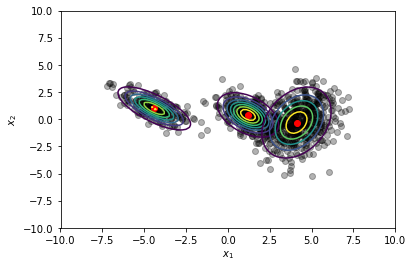

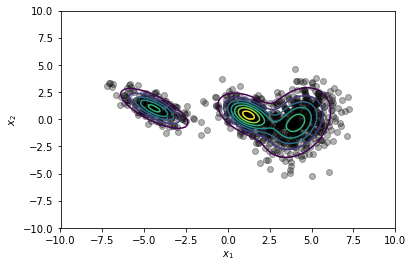

In [4]:
X, Y = np.meshgrid(np.linspace(-10,10,100), np.linspace(-10,10,100))
pos = np.dstack((X, Y))

mvn = multivariate_normal(m[0,:].ravel(), S[0,:,:])
xx = mvn.pdf(pos)

# plot the dataset
plt.figure()
plt.plot(x, y, 'ko', alpha=0.3)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# plot the individual components of the GMM
plt.plot(m[:,0], m[:,1], 'or')

for k in range(3):
    mvn = multivariate_normal(m[k,:].ravel(), S[k,:,:])
    xx = mvn.pdf(pos)
    plt.contour(X, Y, xx,  alpha = 1.0, zorder=10)
     
# plot the GMM 
plt.figure()
plt.plot(x, y, 'ko', alpha=0.3)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# build the GMM
gmm = 0
for k in range(3):
    mix_comp = multivariate_normal(m[k,:].ravel(), S[k,:,:])
    gmm += w[k]*mix_comp.pdf(pos)
    
plt.contour(X, Y, gmm,  alpha = 1.0, zorder=10);

### Initialize the parameters for EM

In [5]:
K = 3 # number of clusters

means = np.zeros((K,2))
covs = np.zeros((K,2,2))
for k in range(K):
    means[k] = np.random.normal(size=(2,))
    covs[k] = np.eye(2)

weights = np.ones((K,1))/K
print("Initial mean vectors (one per row):\n" + str(means))

Initial mean vectors (one per row):
[[-0.67517827 -0.14451867]
 [-0.79241992 -0.30796153]
 [-1.89361467  0.21329371]]


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  app.launch_new_instance()


Text(0,0.5,'$x_2$')

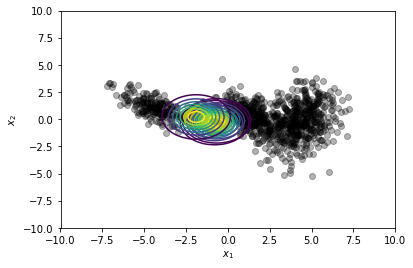

In [7]:
#EDIT THIS FUNCTION
NLL = [] # log-likelihood of the GMM
gmm_nll = 0
NLL += [gmm_nll] #<-- REPLACE THIS LINE

plt.figure()
plt.plot(x, y, 'ko', alpha=0.3)
plt.plot(means[:,0], means[:,1], 'oy', markersize=25)
for k in range(K):
    xx = mlab.bivariate_normal(X, Y, covs[k,0,0], covs[k,1,1], means[k,0], means[k,1], covs[k,0,1])
    plt.contour(X, Y, xx,  alpha = 1.0, zorder=10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

First, we define the responsibilities (which are updated in the E-step), given the model parameters $\pi_k, \boldsymbol\mu_k, \boldsymbol\Sigma_k$ as
$$
r_{nk} := \frac{\pi_k\mathcal N(\boldsymbol
          x_n|\boldsymbol\mu_k,\boldsymbol\Sigma_k)}{\sum_{j=1}^K\pi_j\mathcal N(\boldsymbol
          x_n|\boldsymbol \mu_j,\boldsymbol\Sigma_j)} 
          $$

Given the responsibilities we just defined, we can update the model parameters in the M-step as follows:
\begin{align*}
\boldsymbol\mu_k^\text{new} &= \frac{1}{N_k}\sum_{n = 1}^Nr_{nk}\boldsymbol x_n\,,\\
   \boldsymbol\Sigma_k^\text{new}&= \frac{1}{N_k}\sum_{n=1}^Nr_{nk}(\boldsymbol x_n-\boldsymbol\mu_k)(\boldsymbol x_n-\boldsymbol\mu_k)^\top\,,\\
   \pi_k^\text{new} &= \frac{N_k}{N}
\end{align*}
where $$
N_k := \sum_{n=1}^N r_{nk}
$$

In [ ]:
#EDIT THIS FUNCTION
r = np.zeros((K,N)) # will store the responsibilities

for em_iter in range(100):
    
    means_old = means.copy()
    
    # E-step: update responsibilities
    r = np.zeros((K,N)) #<-- REPLACE THIS LINE
        
    # M-step
    N_k = np.sum(r, axis=1)

    for k in range(K): 
        # update the means
        means[k] = 0 #<-- REPLACE THIS LINE
        
        # update the covariances
        covs[k] = 0  #<-- REPLACE THIS LINE
        
    # weights
    weights = 0 #<-- REPLACE THIS LINE
    
    # log-likelihood
    NLL += [10] #<-- REPLACE THIS LINE
    
    plt.figure() 
    plt.plot(x, y, 'ko', alpha=0.3)
    #plt.plot(m[:,0], m[:,1], 'or', zorder=9)
    plt.plot(means[:,0], means[:,1], 'oy', markersize=25)
    for k in range(K):
        xx = mlab.bivariate_normal(X, Y, covs[k,0,0], covs[k,1,1], means[k,0], means[k,1], covs[k,0,1])
        plt.contour(X, Y, xx,  alpha = 1.0, zorder=10)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.text(x=3.5, y=8, s="EM iteration "+str(em_iter+1))
    
    if la.norm(NLL[em_iter+1]-NLL[em_iter]) < 1e-6:
        print("Converged after iteration ", em_iter+1)
        break
   
# plot final the mixture model
plt.figure() 
gmm = 0
for k in range(3):
    mix_comp = multivariate_normal(means[k,:].ravel(), covs[k,:,:])
    gmm += weights[k]*mix_comp.pdf(pos)

plt.plot(x, y, 'ko', alpha=0.3)
plt.contour(X, Y, gmm,  alpha = 1.0, zorder=10)    
plt.xlim([-8,8])
plt.ylim([-6,6])

In [ ]:
plt.figure()
plt.semilogy(np.linspace(1,len(NLL), len(NLL)), NLL)
plt.xlabel("EM iteration")
plt.ylabel("Negative log-likelihood")

idx = [0, 1, 9, em_iter+1]

for i in idx:
    plt.plot(i+1, NLL[i], 'or')